[Reference](https://medium.com/@amit25173/how-to-calculate-moving-average-in-pandas-62b9ececfc5c)

In [1]:
import pandas as pd

# Sample data representing sales over 10 days
data = {'Sales': [200, 220, 250, 270, 300, 320, 350, 370, 400, 420]}
df = pd.DataFrame(data)
print(df)

   Sales
0    200
1    220
2    250
3    270
4    300
5    320
6    350
7    370
8    400
9    420


In [2]:
# Simple Moving Average with a window size of 3
df['SMA_3'] = df['Sales'].rolling(window=3).mean()
print(df)

   Sales       SMA_3
0    200         NaN
1    220         NaN
2    250  223.333333
3    270  246.666667
4    300  273.333333
5    320  296.666667
6    350  323.333333
7    370  346.666667
8    400  373.333333
9    420  396.666667


In [3]:
# Exponential Moving Average with a span of 3
df['EMA_3'] = df['Sales'].ewm(span=3, adjust=False).mean()
print(df)

   Sales       SMA_3      EMA_3
0    200         NaN  200.00000
1    220         NaN  210.00000
2    250  223.333333  230.00000
3    270  246.666667  250.00000
4    300  273.333333  275.00000
5    320  296.666667  297.50000
6    350  323.333333  323.75000
7    370  346.666667  346.87500
8    400  373.333333  373.43750
9    420  396.666667  396.71875


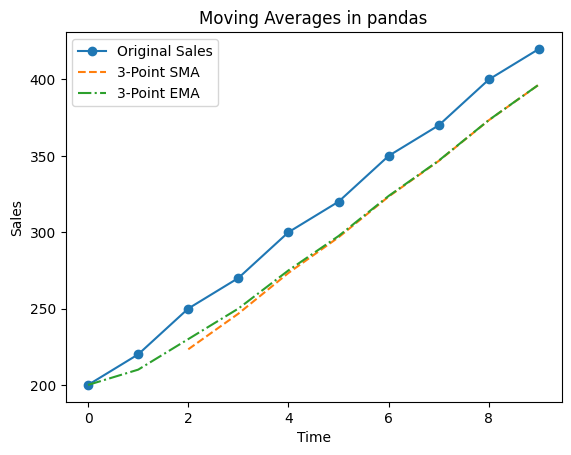

In [4]:
import matplotlib.pyplot as plt

plt.plot(df['Sales'], label='Original Sales', marker='o')
plt.plot(df['SMA_3'], label='3-Point SMA', linestyle='--')
plt.plot(df['EMA_3'], label='3-Point EMA', linestyle='-.')
plt.legend()
plt.title('Moving Averages in pandas')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()

In [5]:
import pandas as pd

# Sample data
data = {
    'Sales': [200, 220, 250, 270, 300, 320, 350],
    'Profit': [50, 55, 60, 65, 70, 75, 80]
}
df = pd.DataFrame(data)

# Applying SMA with window=2 for both columns
df[['Sales_SMA', 'Profit_SMA']] = df[['Sales', 'Profit']].rolling(window=2).mean()

print(df)

   Sales  Profit  Sales_SMA  Profit_SMA
0    200      50        NaN         NaN
1    220      55      210.0        52.5
2    250      60      235.0        57.5
3    270      65      260.0        62.5
4    300      70      285.0        67.5
5    320      75      310.0        72.5
6    350      80      335.0        77.5


In [6]:
df['SMA_3_filled'] = df['Sales'].rolling(window=3).mean().fillna(0)

In [7]:
# Fill NaN with previous value
df['Sales_filled'] = df['Sales'].fillna(method='ffill')

# Apply moving average after filling
df['SMA_after_fill'] = df['Sales_filled'].rolling(window=3).mean()

/tmp/ipython-input-7-1920594752.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sales_filled'] = df['Sales'].fillna(method='ffill')
